Initialize

In [106]:
import warnings;warnings.filterwarnings("ignore")
import pathlib as pl;            import numpy as np
import netCDF4 as nc4;           import pandas as pd
import matplotlib.pyplot as plt; import xarray as xr
import json;                     import requests
import plotly.graph_objs as go;  import folium
from folium.plugins import BeautifyIcon
import geopandas as gpd;
from random import randint
from chart_studio import plotly
from plotly.offline import plot,iplot, init_notebook_mode
from shapely import Polygon,Point,LineString
from datetime import date, datetime, timedelta
from plotly.subplots import make_subplots
import matplotlib
import matplotlib.lines as mlines
from matplotlib.dates import DateFormatter
from IPython.core.display import display, HTML
import io
from PIL import Image


In [107]:
root = pl.Path('C:/Users/decar/OneDrive - George Mason University - O365 Production/fall_24/Independent_Study/Seagrant_Prj/Data')
print(root.exists())

True


In [108]:
c_sensors_bf = gpd.read_file( root / 'GPS' / 'Before' / 'all_canal_processed.shp' )
print(c_sensors_bf)
#creates a list of strings to be used as values for new legend column
string_list = ['None', 'Group 0', 'Group 2', 'Group 0', 'Group 1', 'Group 0', 'Group 0', 'Group 0', 'Group 1', 'Group 0', 'Group 1', 'Group 3', 'Group 0']

#creates legend column and assigns values from string_list_1
c_sensors_bf['legend'] = string_list

                       Name Descriptio   Layer FeatureCod       Easting  \
0                 basecanal       None  Points       None  3.683425e+06   
1                 1010 gmu4       None  Points       None  3.683397e+06   
2                1011 gmu10       None  Points       None  3.683397e+06   
3                1012 gmu11       None  Points       None  3.683396e+06   
4                 1013 gmu6       None  Points       None  3.683393e+06   
5                 1014 gmu2       None  Points       None  3.683396e+06   
6   1017 adcp nearshore odu       None  Points       None  3.683394e+06   
7    1016 adcp offshore odu       None  Points       None  3.683396e+06   
8                 1015 gmu3       None  Points       None  3.683394e+06   
9                1018 gmu12       None  Points       None  3.683397e+06   
10                1019 gmu5       None  Points       None  3.683394e+06   
11                1020 gmu9       None  Points       None  3.683411e+06   
12                1021 gm

In [109]:
c_sensors_af = gpd.read_file( root / 'GPS' / 'After' / 'canal_070924.shp' )  


#creates a list of strings to be used as values for new legend column
string_list_1 = ['None', 'Group 2', 'Group 2', 'Group 0', 'Group 0', 'Group 0', 'Group 1', 'Group 0', 'Group 1', 'Group 0', 'Group 0', 'Group 0', 'Group 3', 'None']

#creates legend column and assigns values from string_list_1
c_sensors_af['legend'] = string_list_1

In [110]:
f = folium.Figure(width = 800, height = 400)
before_sensors_map = folium.Map(location = [37.3308779340014, -76.43010572691506], zoom_start = 18.45).add_to(f)
folium.TileLayer(
    tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr = 'Esri',
    name = 'Esri Satellite', 
    overlay = False,
    control = True
    ).add_to(before_sensors_map)

fg2 = folium.FeatureGroup('Canal Site').add_to(before_sensors_map)
colors = {'Group 1':'#D81B1B', 'Group 2':'#319FFF', 'Group 3':'#FFBF00', 'Group 4':'000000'}



if 'legend' not in c_sensors_bf.columns:
    print("Error: 'legend' column not found in c_sensors_bf DataFrame.")
else:
    for key in colors.keys():
        ids = np.where(c_sensors_bf['legend'].str.contains(key) == True)[0]
        for id in ids:
            folium.CircleMarker(
                (c_sensors_bf.LocalLatit[id], c_sensors_bf.LocalLongi[id]),
                color = colors[key],
                fill_color = colors[key],
                fill_opacity = 0.7,
                radius = 3,
                weight = 2,
                popup = c_sensors_bf['legend'][id]
            ).add_to(fg2)
folium.LayerControl().add_to(before_sensors_map)
# Define the legend's HTML
legend_html = '''
<div style="position: fixed; 
     bottom: 30px; left: 50px; width: 125px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity: 0.85;">
     &nbsp; <b>Sensor Groups</b> <br>
     &nbsp; Group 1 &nbsp; <i class="fa fa-circle" style="color:#D81B1B"></i><br>
     &nbsp; Group 2 &nbsp; <i class="fa fa-circle" style="color:#319FFF"></i><br>
     &nbsp; Group 3 &nbsp; <i class="fa fa-circle" style="color:#FFBF00"></i><br>
</div>
'''

# Add the legend to the map
before_sensors_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
before_sensors_map.save(root / 'map_with_legend.html')
img_data = before_sensors_map._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save(root / 'before_sensors.png')
before_sensors_map



In [104]:
g = folium.Figure(width = 800, height = 400)
after_sensors_map = folium.Map(location = [37.3308779340014, -76.43010572691506], zoom_start = 18.45).add_to(g)
folium.TileLayer(
    tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr = 'Esri',
    name = 'Esri Satellite',
    overlay = False,
    control = True
    ).add_to(after_sensors_map)

fg2 = folium.FeatureGroup('Canal Site').add_to(after_sensors_map)

  
if 'legend' not in c_sensors_af.columns:
    print("Error: 'legend' column not found in c_sensors_af DataFrame.")
else:
    for key in colors.keys():
        ids = np.where(c_sensors_af['legend'].str.contains(key) == True)[0]
        for id in ids:
            folium.CircleMarker(
                (c_sensors_af.LocalLatit[id], c_sensors_af.LocalLongi[id]),
                color = colors[key],
                fill_color = colors[key],
                fill_opacity = 0.7,
                radius = 3,
                weight = 2,
                popup = c_sensors_af['legend'][id]
            ).add_to(fg2)
folium.LayerControl().add_to(after_sensors_map)
legend_html = '''
<div style="position: fixed; 
     bottom: 30px; left: 50px; width: 125px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity: 0.85;">
     &nbsp; <b>Sensor Groups</b> <br>
     &nbsp; Group 1 &nbsp; <i class="fa fa-circle" style="color:#D81B1B"></i><br>
     &nbsp; Group 2 &nbsp; <i class="fa fa-circle" style="color:#319FFF"></i><br>
     &nbsp; Group 3 &nbsp; <i class="fa fa-circle" style="color:#FFBF00"></i><br>
</div>
'''

# Add the legend to the map
after_sensors_map.get_root().html.add_child(folium.Element(legend_html))

img_data = after_sensors_map._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save(root / 'after_sensors.png')

after_sensors_map.save(root / 'after_sensors.html')
after_sensors_map



Datenum to date time function

In [112]:
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    if datenum < 1:
        temp = np.nan
    else:
        days = datenum % 1
        hours = days % 1 * 24
        minutes = hours % 1 * 60
        seconds = minutes % 1 * 60
        temp = datetime.fromordinal(int(datenum)) \
               + timedelta(days=int(days)) \
               + timedelta(hours=int(hours)) \
               + timedelta(minutes=int(minutes)) \
               + timedelta(seconds=round(seconds)) \
               - timedelta(days=366)
    return temp

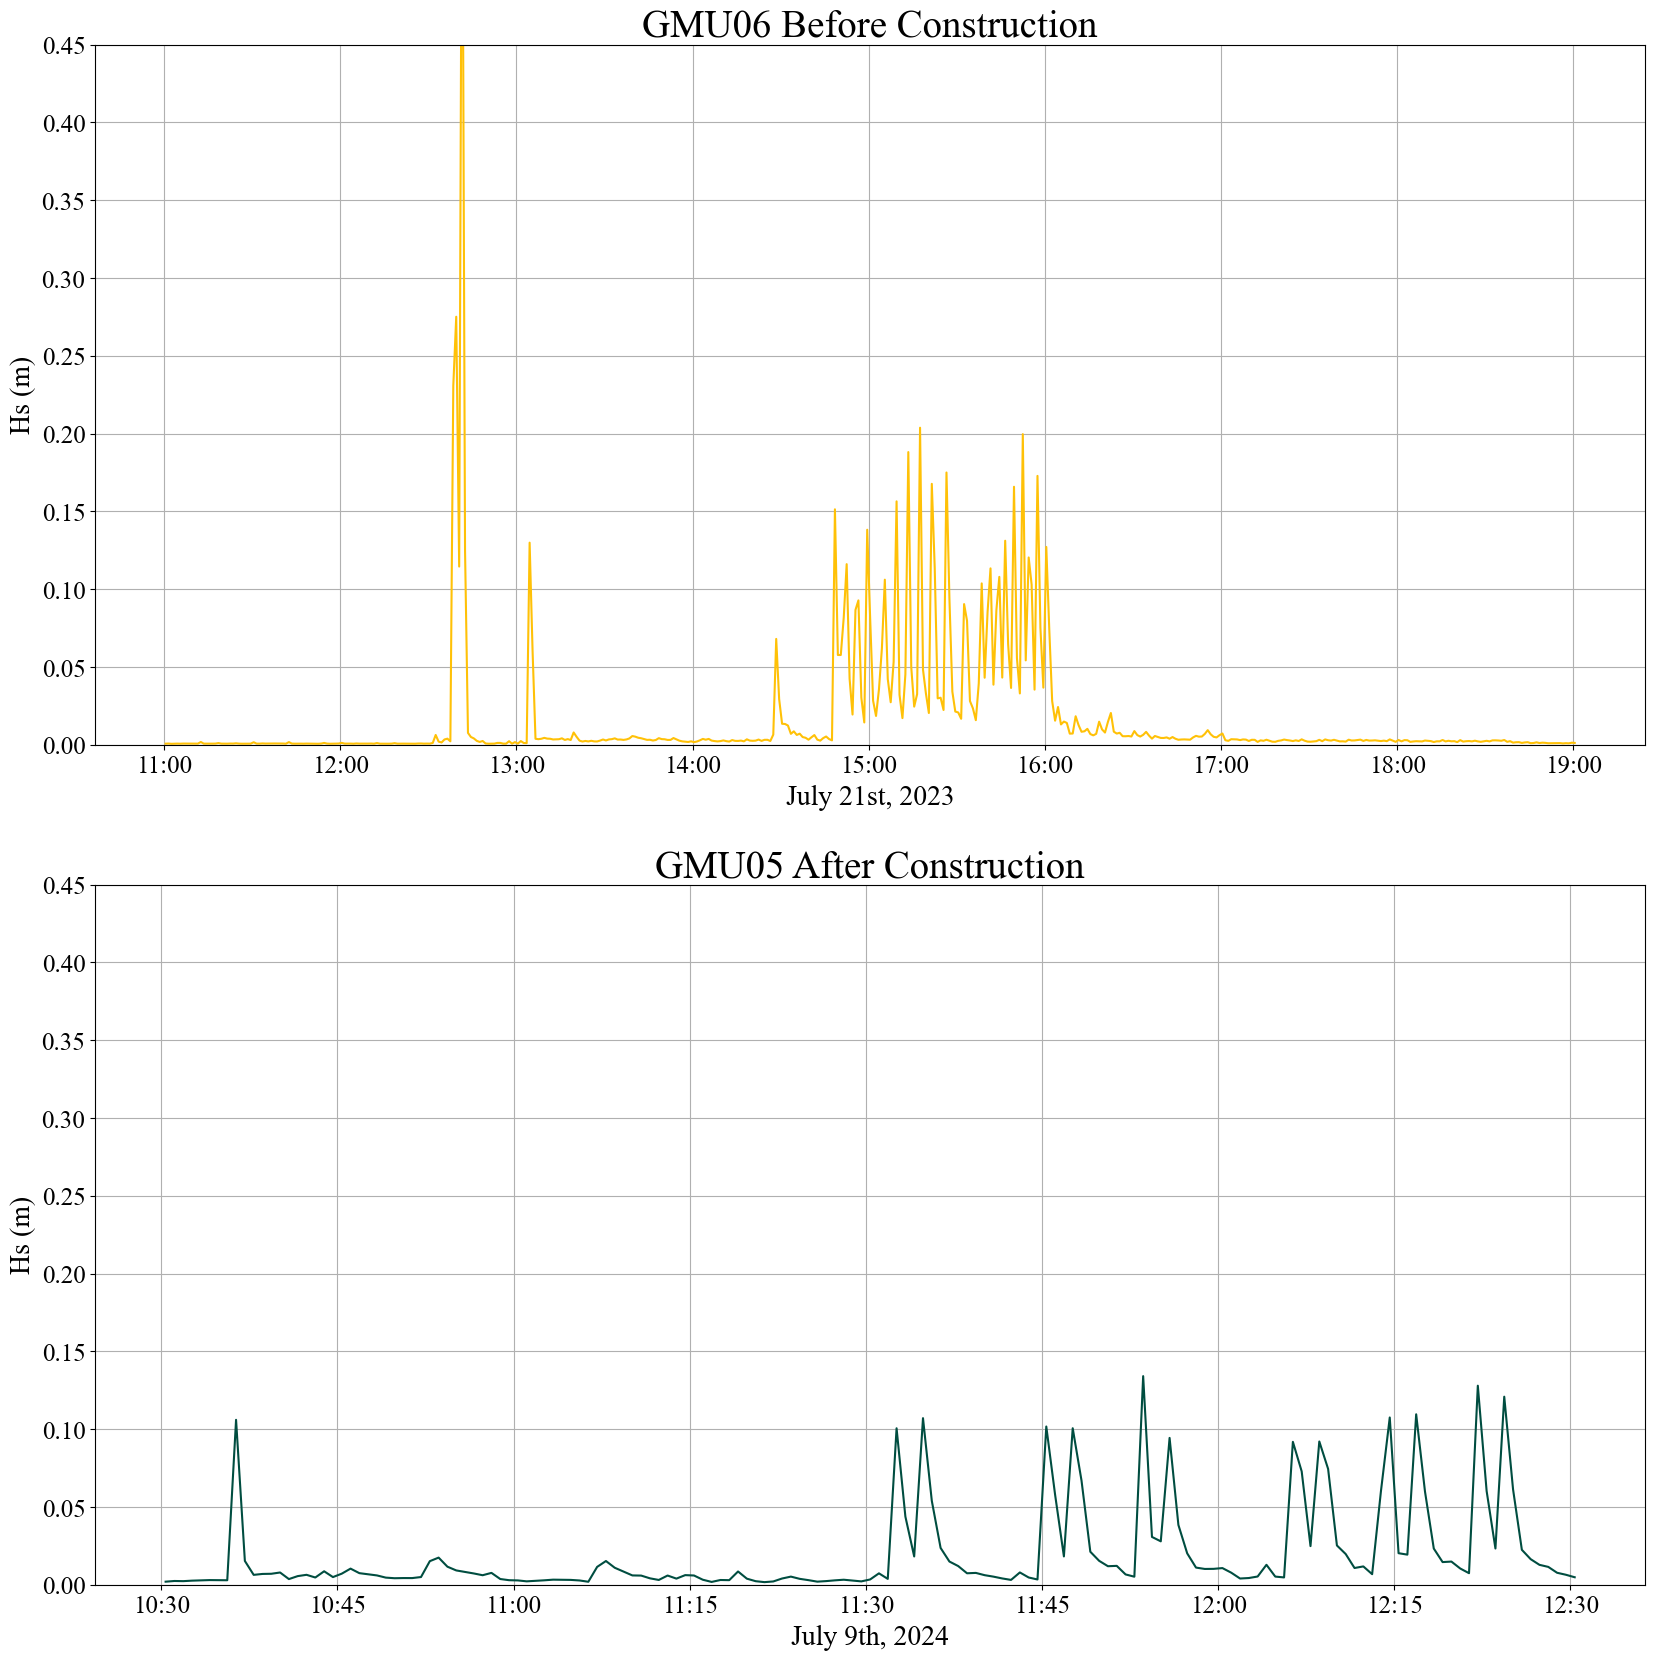

In [123]:
date_format = DateFormatter('%H:%M')
def my_plotter(ax, data1, data2, param_dict = {'marker': ',', 'color': 'black', 'linestyle': 'solid'}):
    out = ax.plot(data1, data2, **param_dict)
    return out
def formatter(ax):
    ax.grid()
    ax.set_ylim(0, 0.45)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 20})
    ax.tick_params(axis='x', labelsize = 18)
    ax.tick_params(axis='y', labelsize = 18)
    ax.set_ylabel('Hs (m)')
    ax.xaxis.set_major_formatter(date_format)
    return ax
pairs_bf = ['GMU06.nc']
pairs_af = ['GMU05.nc']

plots_bf = []
for p in range(len(pairs_bf)):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_072123' / '02_Processed' / 'canal' / pairs_bf[0])
    dt = []
    hs = file['Hs']
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    plots_bf.append([time, hs])

plots_af = []
for p in range(len(pairs_af)):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_070924' / '02_Processed' / pairs_af[0])
    dt = []
    hs = file['Hs']
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    plots_af.append([time, hs])

fig, ax = plt.subplots(2, 1, figsize = (20, 20))

my_plotter(ax[0], plots_bf[0][0], plots_bf[0][1], {'color': '#FFC107'})
formatter(ax[0])
ax[0].set_title('GMU06 Before Construction', fontsize = 28)
ax[0].set_xlabel('July 21st, 2023')

my_plotter(ax[1], plots_af[0][0], plots_af[0][1], {'color': '#004D40'})
formatter(ax[1])
ax[1].set_title('GMU05 After Construction', fontsize = 28)
ax[1].set_xlabel('July 9th, 2024')

plt.savefig(root / 'Graphs'/ 'GMU_5_6_comparison', bbox_inches = 'tight', pad_inches = 0.1, dpi = 750, transparent = True)


Time series of all bank adjacent sensors

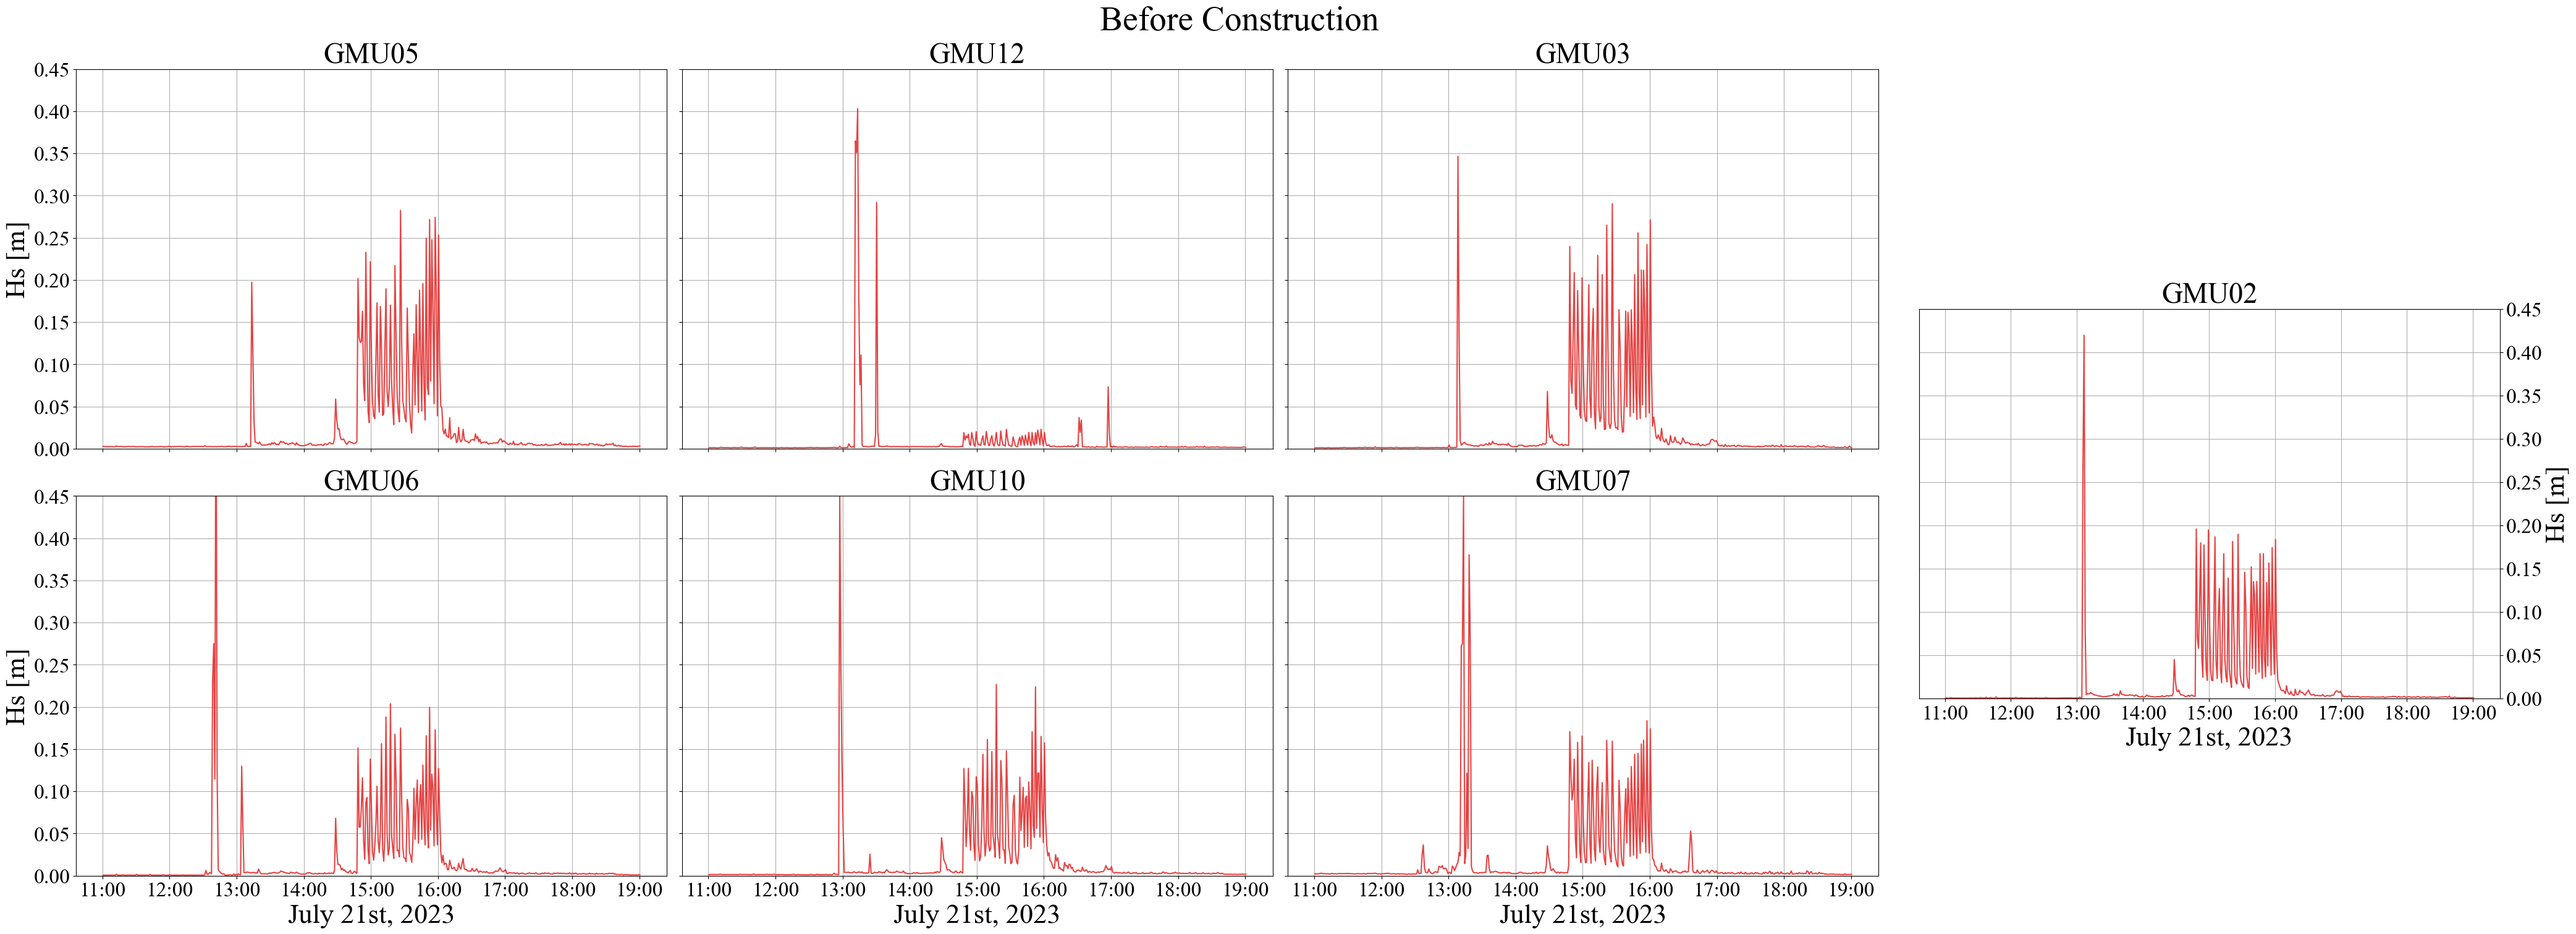

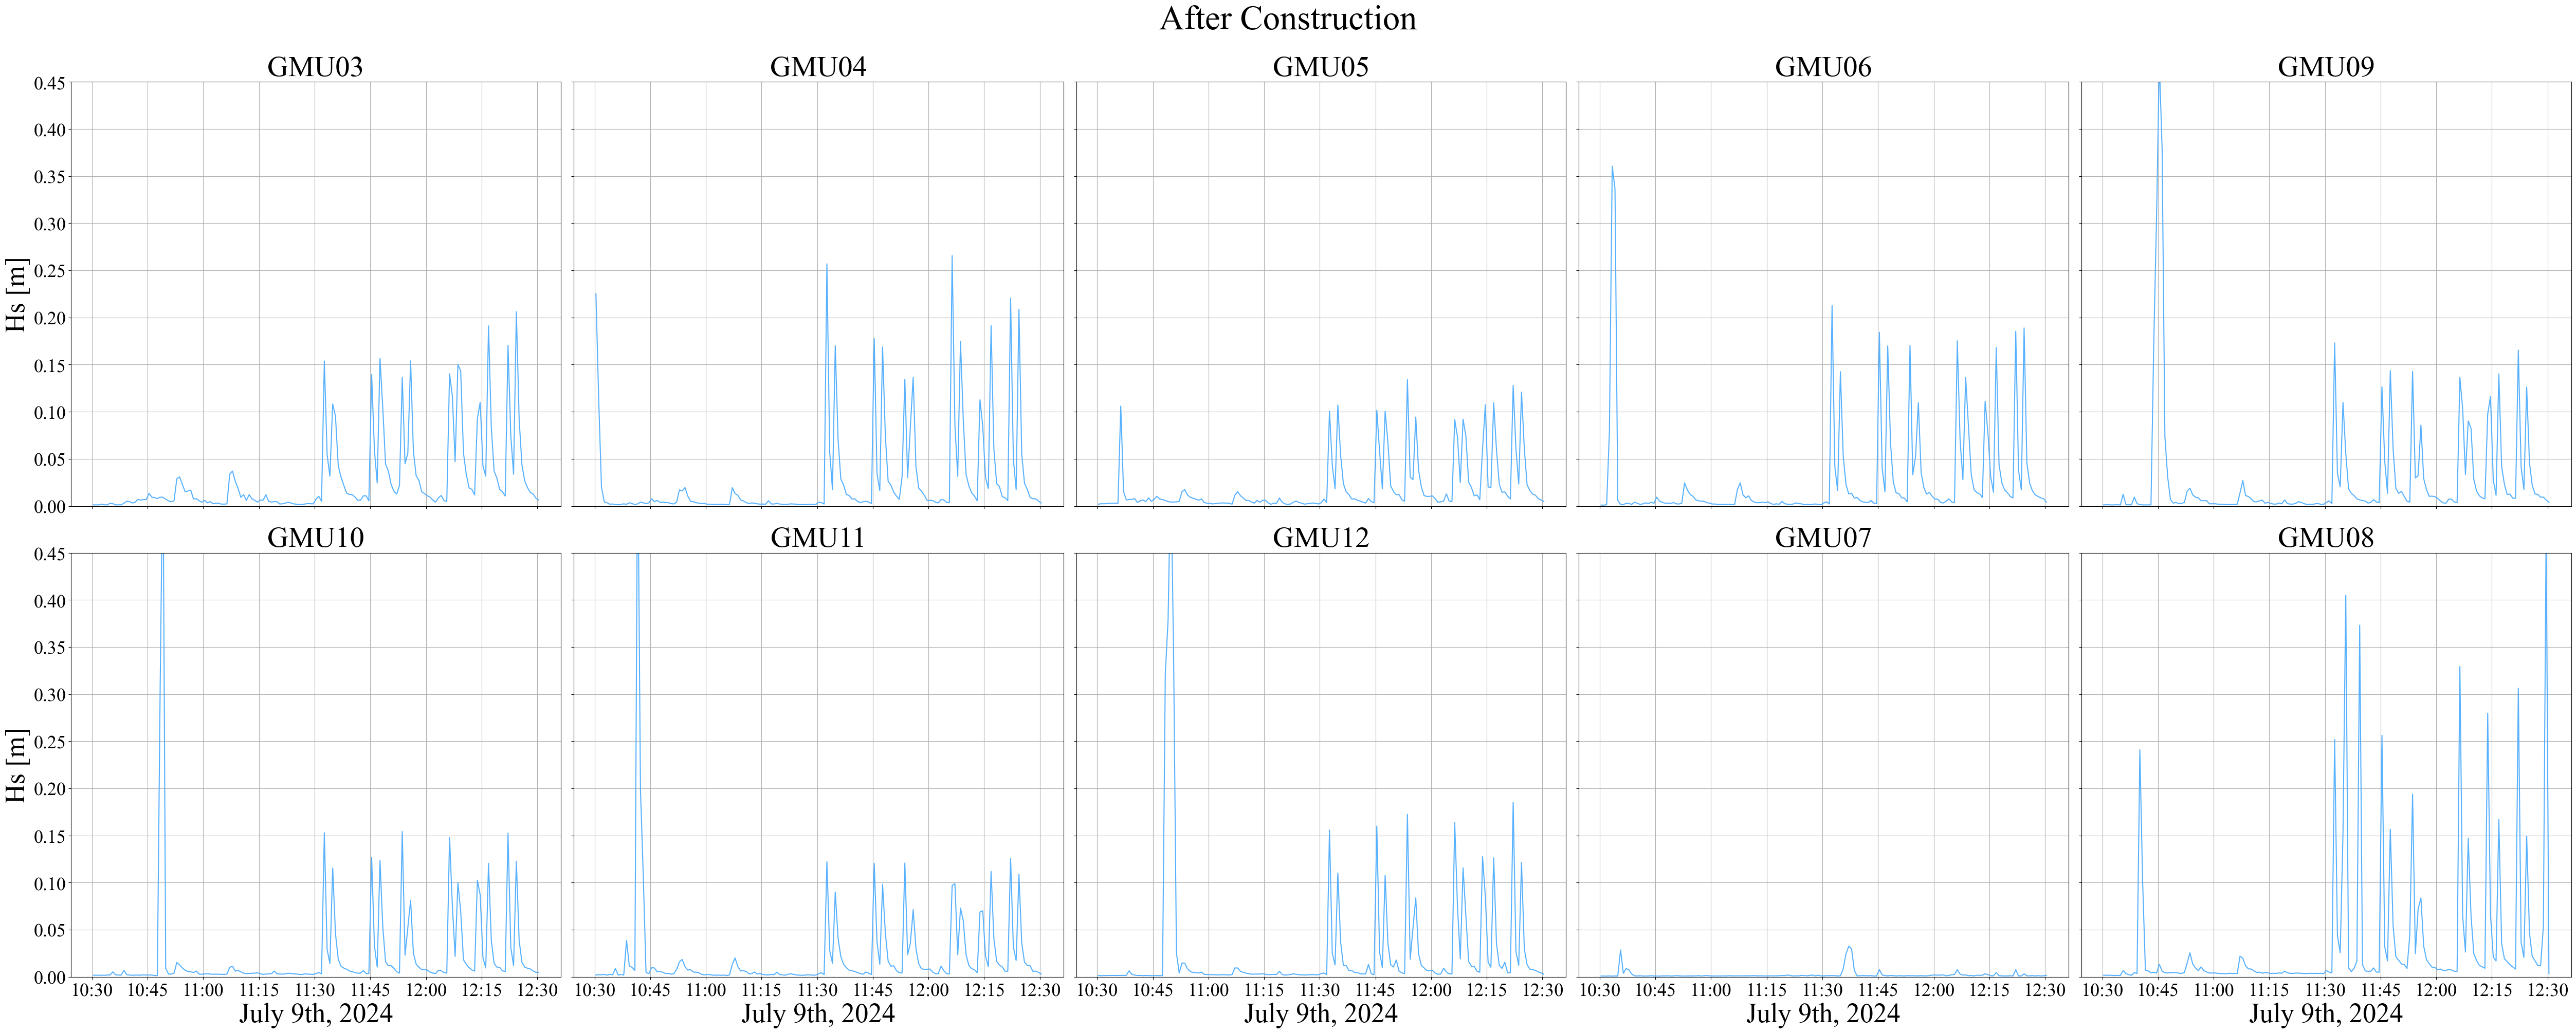

In [117]:
#Change to all sensors not just water
def my_plotter(ax, data1, data2, param_dict = {'marker': ',', 'color': 'black', 'linestyle': 'solid'}):
    out = ax.plot(data1, data2, **param_dict)
    return out
def formatter(ax):
    ax.grid()
    ax.set_ylim(0, 0.45)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 28})
    ax.tick_params(axis='x', labelsize = 24)
    ax.tick_params(axis='y', labelsize = 24)
    return ax

pairs = [['GMU05.nc', 'GMU12.nc', 'GMU03.nc', 'GMU02.nc','GMU06.nc', 'GMU10.nc', 'GMU07.nc'],
        ['GMU03.nc', 'GMU04.nc', 'GMU05.nc', 'GMU06.nc', 'GMU09.nc', 'GMU10.nc', 'GMU11.nc', 'GMU12.nc', 'GMU07.nc', 'GMU08.nc']]




plots_bf = []
for p in range(len(pairs[0])):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_072123' / '02_Processed' / 'canal' / pairs[0][p])
    dt = []
    hs = file['Hs']
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    plots_bf.append([time, hs])

plots_af = []
for p in range(len(pairs[1])):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_070924' / '02_Processed' / pairs[1][p])
    dt = []
    hs = file['Hs']
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    plots_af.append([time, hs])




fig_1, axs = plt.subplots(2, 4, figsize = (40, 15),layout="constrained")

for i in range(7):
    if i < 4:
        my_plotter(axs[0, i], plots_bf[i][0], plots_bf[i][1], {'color': '#E64343'})
        formatter(axs[0, i])
    else:
        j = i - 4
        my_plotter(axs[1, j], plots_bf[i][0], plots_bf[i][1], {'color': '#E64343'})
        formatter(axs[1, j])

date_format = DateFormatter('%H:%M')
for i in range(4):
    axs[1, i].xaxis.set_major_formatter(date_format)
    axs[1, i].set_xlabel('July 21st, 2023')

for r in range(4):  
   axs[0, r].set_xticklabels([])
    

for i in range(2):
    for j in range(1, 3):
        axs[i, j].set_yticklabels([])

for i in range(2):
    axs[i, 0].set_ylabel('Hs [m]')

axs[1, 3].remove()
axs[0, 3].set_ylabel('Hs [m]')
axs[0, 3].yaxis.set_label_position("right")
axs[0, 3].yaxis.tick_right()
axs[0, 3].xaxis.set_major_formatter(date_format)
axs[0, 3].set_xlabel('July 21st, 2023')
plt.suptitle('Before Construction', fontsize = 40)

axs[0, 3].set_position([0.775, 0.25, 0.235, 0.42])  # [left, bottom, width, height]

axs[0, 0].set_title('GMU05')
axs[0, 1].set_title('GMU12')
axs[0, 2].set_title('GMU03')
axs[0, 3].set_title('GMU02')
axs[1, 0].set_title('GMU06')
axs[1, 1].set_title('GMU10')
axs[1, 2].set_title('GMU07')
plt.savefig(root / 'Graphs'/ 'all_before', bbox_inches = 'tight', pad_inches = 0.1, dpi = 750, transparent = True)
def formatter_2(ax):
    ax.grid()
    ax.set_ylim(0, 0.45)
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 34})
    ax.tick_params(axis='x', labelsize = 26)
    ax.tick_params(axis='y', labelsize = 26)
    return ax

fig_2, axs_2 = plt.subplots(2, 5, figsize = (50, 19),layout="constrained")
for i in range(10):
    if i < 5:
        my_plotter(axs_2[0, i], plots_af[i][0], plots_af[i][1], {'color': '#57B1FF'})
        formatter_2(axs_2[0, i])
        
        
    else:
        j = i - 5
        my_plotter(axs_2[1, j], plots_af[i][0], plots_af[i][1], {'color': '#57B1FF'})
        formatter_2(axs_2[1, j])

date_format = DateFormatter('%H:%M')
for i in range(5):
    axs_2[1, i].xaxis.set_major_formatter(date_format)
    axs_2[1, i].set_xlabel('July 9th, 2024', fontsize = 38)

for r in range(5):  
   axs_2[0, r].set_xticklabels([])
    

for i in range(2):
    for j in range(1, 5):
        axs_2[i, j].set_yticklabels([])

for i in range(2):
    axs_2[i, 0].set_ylabel('Hs [m]', fontsize = 38)

plt.suptitle('After Construction', fontsize = 48, y = 1.05, x = 0.5)



axs_2[0, 0].set_title('GMU03')
axs_2[0, 1].set_title('GMU04')
axs_2[0, 2].set_title('GMU05')
axs_2[0, 3].set_title('GMU06')
axs_2[0, 4].set_title('GMU09')
axs_2[1, 0].set_title('GMU10')
axs_2[1, 1].set_title('GMU11')
axs_2[1, 2].set_title('GMU12')
axs_2[1, 3].set_title('GMU07')
axs_2[1, 4].set_title('GMU08')


plt.savefig(root / 'Graphs'/ 'all_after', bbox_inches = 'tight', pad_inches = 0.1, dpi = 750, transparent = True)

Time series of bank adjacent sensors seperated by NNBF type 

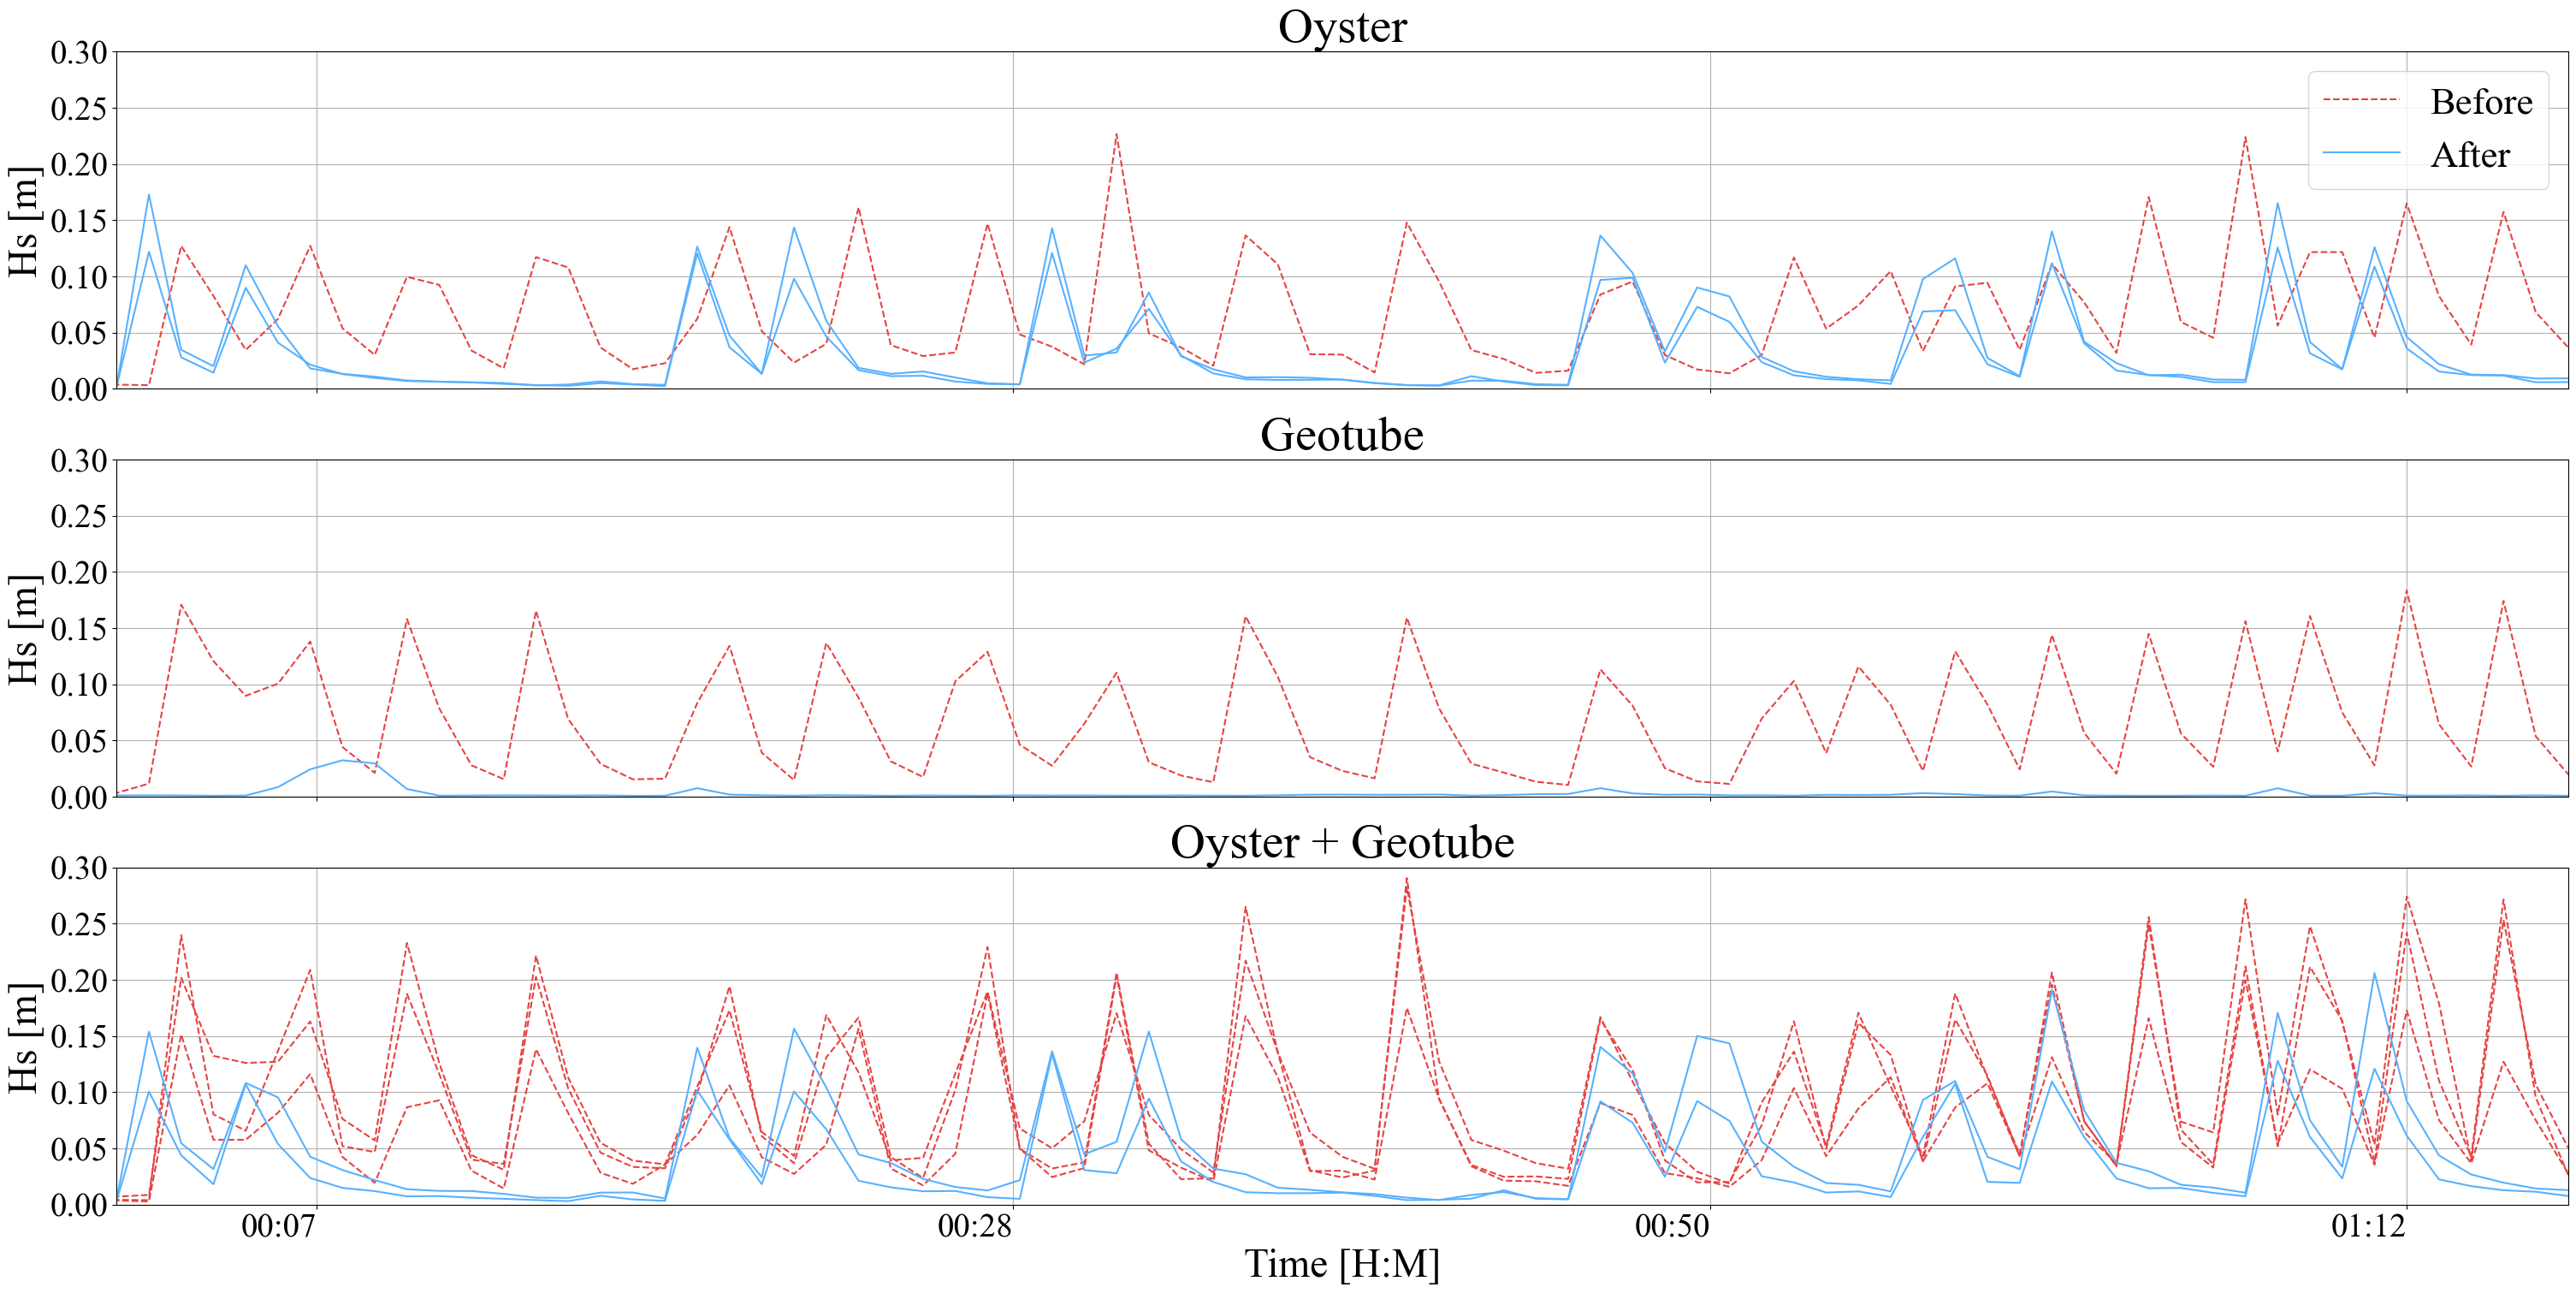

In [97]:
def my_plotter(ax, data1, data2, param_dict = {'marker': ',', 'color': 'black', 'linestyle': 'solid', 'label' : ''}):
    out = ax.plot(data1, data2, **param_dict)
    return out

def formatter(ax):
    ax.set_ylabel('Hs [m]')
    ax.grid()
    ax.set_ylim(0, 0.30)
    ax.set_xlim(datetime(2023, 7, 21, 00, 1), datetime(2023, 7, 21, 1, 17))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 32})
    ax.tick_params(axis='x', labelsize = 28)
    ax.tick_params(axis='y', labelsize = 28)
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation = 0, horizontalalignment = 'right')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5)), ax.yaxis.set_major_locator(plt.MaxNLocator(6))

    return ax



pairs_bf = ['GMU05.nc', 'GMU12.nc', 'GMU03.nc', 'GMU02.nc','GMU06.nc', 'GMU10.nc', 'GMU07.nc']
pairs_af = ['GMU03.nc', 'GMU04.nc', 'GMU05.nc', 'GMU06.nc', 'GMU09.nc', 'GMU10.nc', 'GMU11.nc', 'GMU12.nc', 'GMU07.nc', 'GMU08.nc']

time_standard = []

for i in range(80):
    time_standard.append(datetime(2023, 7, 21, 0, 0) + timedelta(minutes = i))


plots_bf = []
for p in range(len(pairs_bf)):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_072123' / '02_Processed' / 'canal' / pairs_bf[p])
    dt = []
    hs = []
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    for h in range(len(file['Hs'].data)):
        if datetime(2023, 7, 21, 14, 45) <= time[h] <= datetime(2023, 7, 21, 16, 5):
            hs.append(file['Hs'].data[h])
    plots_bf.append([time_standard, hs])

plots_af = []
for p in range(len(pairs_af)):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_070924' / '02_Processed' / pairs_af[p])
    dt = []
    hs = []
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    for h in range(len(file['Hs'].data)):
        if datetime(2024, 7, 9, 11, 31) <= time[h] <= datetime(2024, 7, 9, 12, 33):
            hs.append(file['Hs'].data[h])
    plots_af.append([time_standard, hs])

fig, axs = plt.subplots(3, 1, figsize = (30, 15), layout = 'constrained')


#Banks are red, water is blue, after is dashed
#Only oyster walls
my_plotter(axs[0], plots_bf[5][0], plots_bf[5][1], {'color': '#E64343', 'linestyle': 'dashed', 'label' : 'Before'})
my_plotter(axs[0], plots_af[4][0], plots_af[4][1], {'color': '#57B1FF', 'label' : 'After'})
my_plotter(axs[0], plots_af[6][0], plots_af[6][1], {'color': '#57B1FF'})
axs[0].set_title('Oyster')

#Only geotubes
my_plotter(axs[1], plots_bf[6][0], plots_bf[6][1], {'color': '#E64343', 'linestyle': 'dashed'})
my_plotter(axs[1], plots_af[8][0], plots_af[8][1], {'color': '#57B1FF'} )
axs[1].set_title('Geotube')

#Both geotubes and oyster walls
my_plotter(axs[2], plots_bf[0][0], plots_bf[0][1], {'color': '#E64343', 'linestyle': 'dashed'})
my_plotter(axs[2], plots_bf[2][0], plots_bf[2][1], {'color': '#E64343', 'linestyle': 'dashed'})
my_plotter(axs[2], plots_bf[4][0], plots_bf[4][1], {'color': '#E64343', 'linestyle': 'dashed'})
my_plotter(axs[2], plots_af[0][0], plots_af[0][1], {'color': '#57B1FF'}) #After
my_plotter(axs[2], plots_af[2][0], plots_af[2][1], {'color': '#57B1FF'})

axs[2].set_title('Oyster + Geotube')

date_format = DateFormatter('%H:%M')
axs[2].xaxis.set_major_formatter(date_format)
axs[2].set_xlabel('Time [H:M]')

axs[0].set_xticklabels([])
axs[1].set_xticklabels([])
formatter(axs[0])
formatter(axs[1])
formatter(axs[2])

axs[0].legend()
plt.savefig(root / 'Graphs'/ 'bank_all_type_sep', bbox_inches = 'tight', pad_inches = 0.1, dpi = 750, transparent = True)

All sensors seperated by NNBF type

4
5
6
7


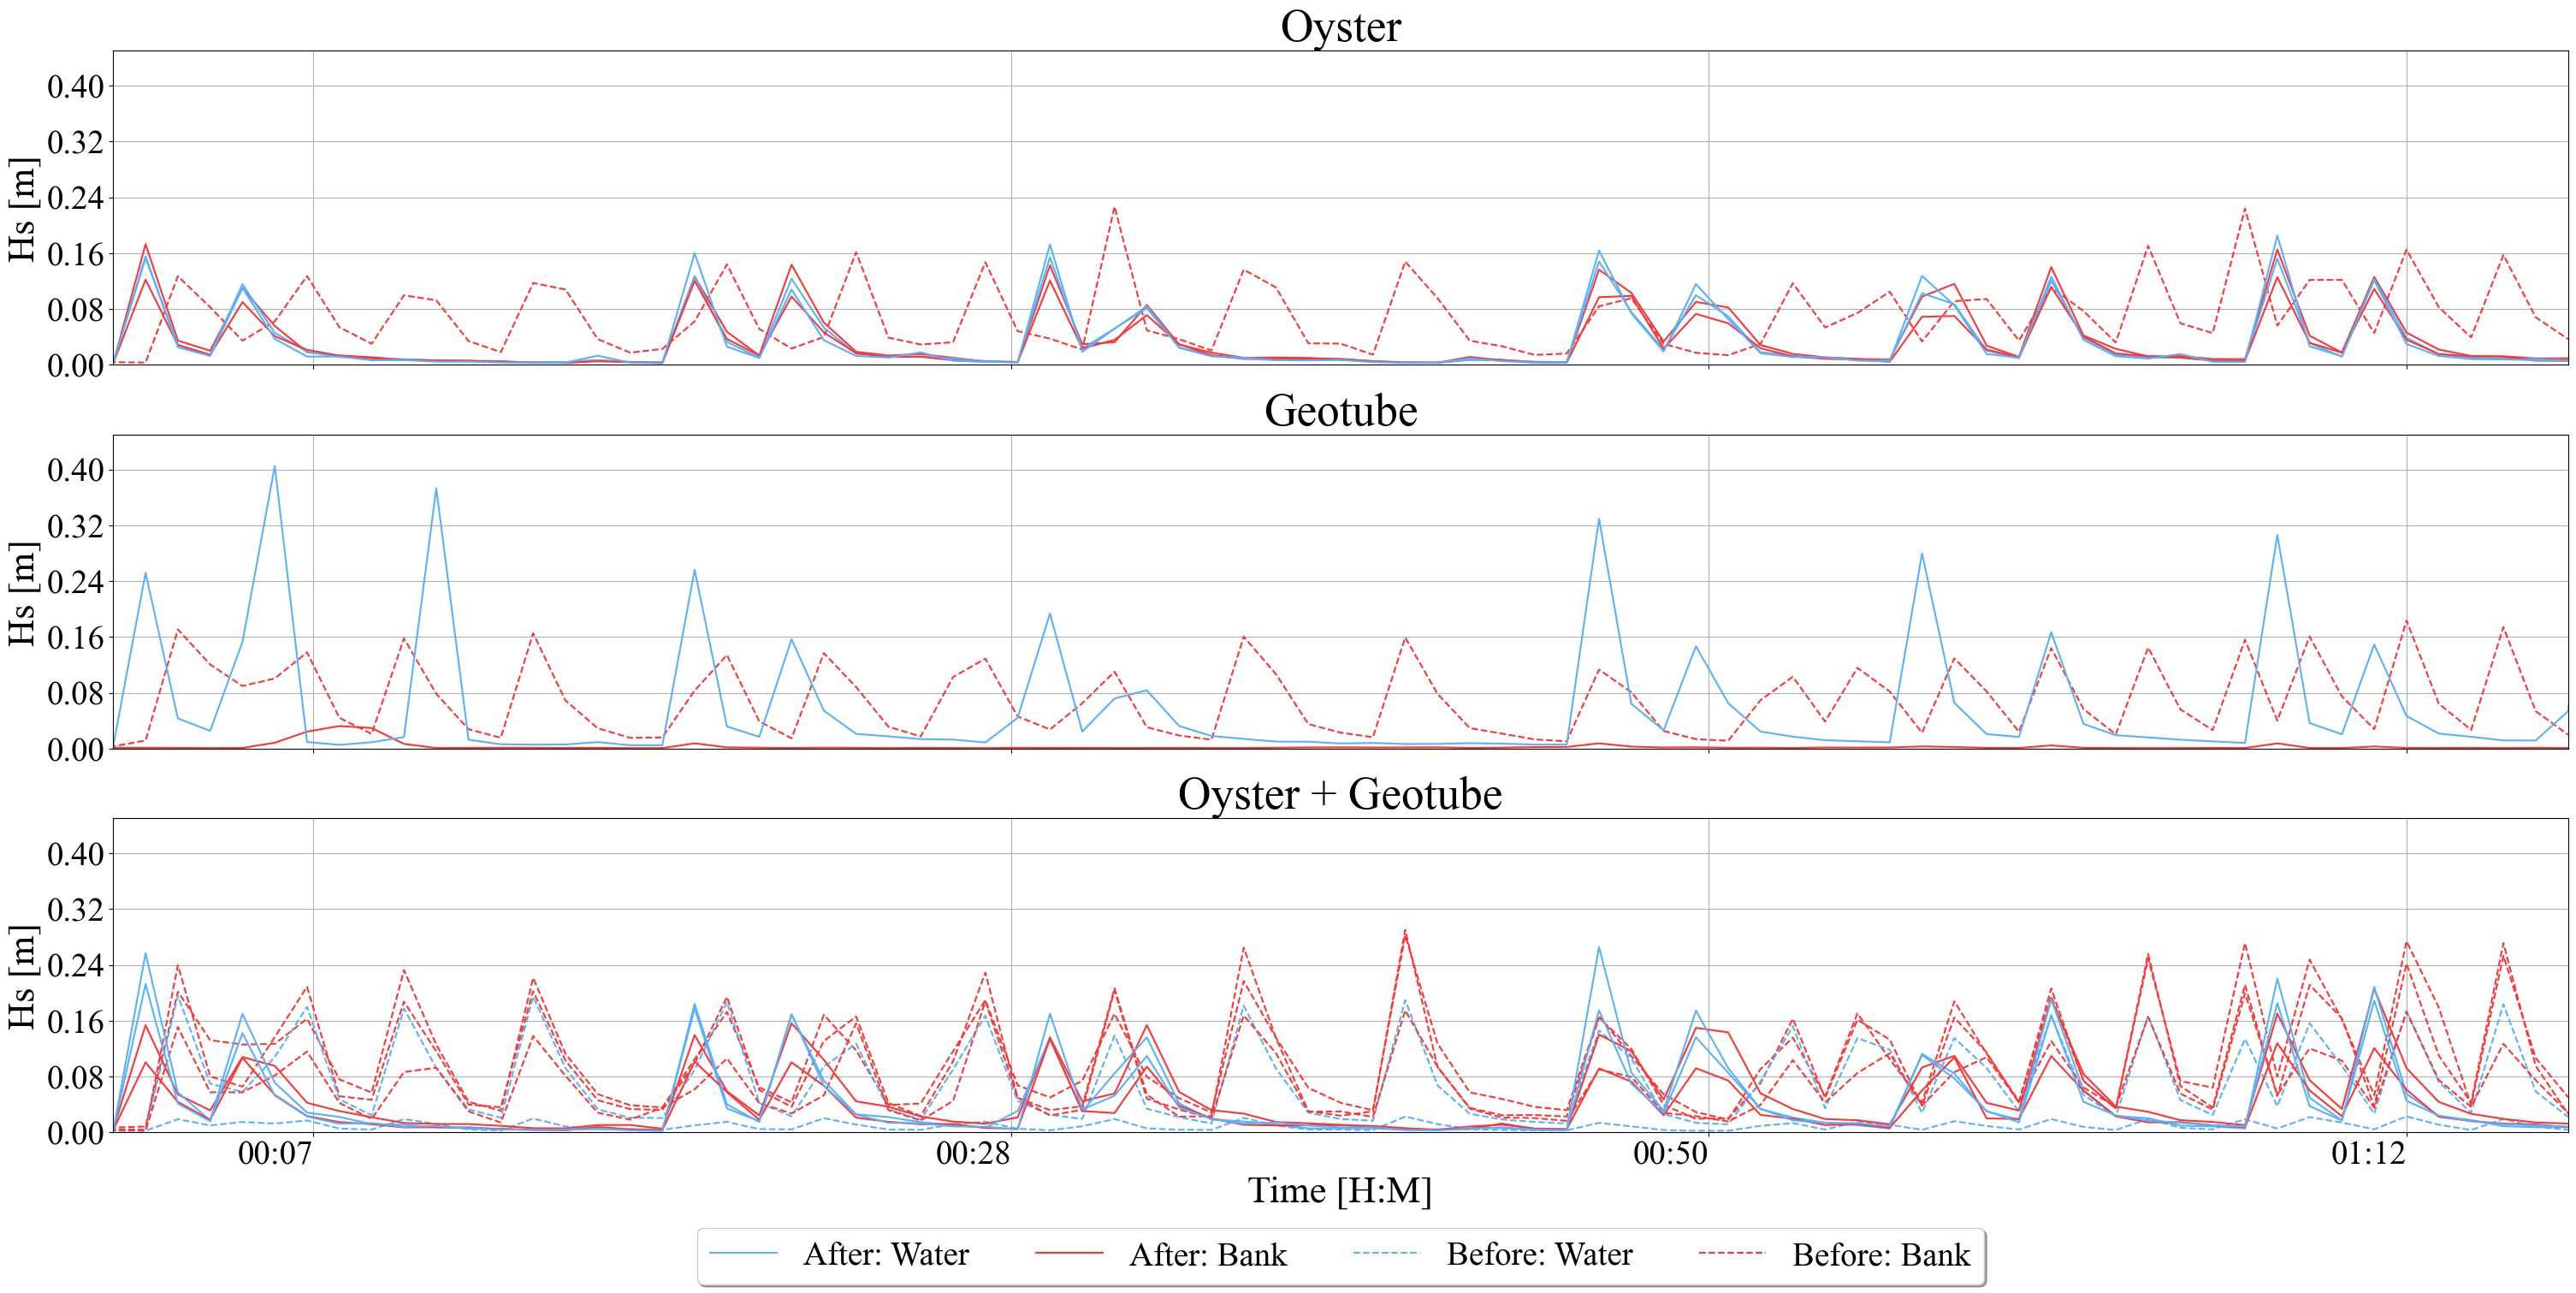

In [98]:
def my_plotter(ax, data1, data2, param_dict = {'marker': ',', 'color': 'black', 'linestyle': 'solid', 'label' : ''}):
    out = ax.plot(data1, data2, **param_dict)
    return out

def formatter(ax):
    ax.set_ylabel('Hs [m]')
    ax.grid()
    ax.set_ylim(0, 0.45)
    ax.set_xlim(datetime(2023, 7, 21, 00, 1), datetime(2023, 7, 21, 1, 17))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 32})
    ax.tick_params(axis='x', labelsize = 28)
    ax.tick_params(axis='y', labelsize = 28)
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation = 0, horizontalalignment = 'right')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5)), ax.yaxis.set_major_locator(plt.MaxNLocator(6))

    return ax



pairs_bf = ['GMU05.nc', 'GMU12.nc', 'GMU03.nc', 'GMU02.nc','GMU06.nc', 'GMU10.nc', 'GMU07.nc']
pairs_af = ['GMU03.nc', 'GMU04.nc', 'GMU05.nc', 'GMU06.nc', 'GMU09.nc', 'GMU10.nc', 'GMU11.nc', 'GMU12.nc', 'GMU07.nc', 'GMU08.nc']

time_standard = []

for i in range(80):
    time_standard.append(datetime(2023, 7, 21, 0, 0) + timedelta(minutes = i))

plots_bf = []
for p in range(len(pairs_bf)):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_072123' / '02_Processed' / 'canal' / pairs_bf[p])
    dt = []
    hs = []
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    for h in range(len(file['Hs'].data)):
        if datetime(2023, 7, 21, 14, 45) <= time[h] <= datetime(2023, 7, 21, 16, 5):
            hs.append(file['Hs'].data[h])
    plots_bf.append([time_standard, hs])

plots_af = []
for p in range(len(pairs_af)):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_070924' / '02_Processed' / pairs_af[p])
    dt = []
    hs = []
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    for h in range(len(file['Hs'].data)):
        if datetime(2024, 7, 9, 11, 31) <= time[h] <= datetime(2024, 7, 9, 12, 33):
            hs.append(file['Hs'].data[h])
    plots_af.append([time_standard, hs])

fig, axs = plt.subplots(3, 1, figsize = (30, 15), layout = 'constrained')
#after water = light blue, after bank = light red, before water = dark blue, before bank = dark red
#Only oyster walls
my_plotter(axs[0], plots_bf[5][0], plots_bf[5][1], {'color': '#FF3434', 'linestyle': 'dashed'})
for h in range(4, 8):
    print(h)
    if h % 2 == 0:
        my_plotter(axs[0], plots_af[h][0], plots_af[h][1], {'color': '#FF3434'})
    else:
        my_plotter(axs[0], plots_af[h][0], plots_af[h][1], {'color': '#57B1FF'})

axs[0].set_title('Oyster')

labels = ['Before', 'After']

#Only geotubes
my_plotter(axs[1], plots_bf[6][0], plots_bf[6][1], {'color': '#FF3434', 'linestyle': 'dashed'})
my_plotter(axs[1], plots_af[8][0], plots_af[8][1], {'color': '#FF3434'}) #after
my_plotter(axs[1], plots_af[9][0], plots_af[9][1], {'color': '#57B1FF'})
axs[1].set_title('Geotube')

#Both geotubes and oyster walls
for j in range(5):
    if j % 2 == 0:
        my_plotter(axs[2], plots_bf[j][0], plots_bf[j][1], {'color': '#FF3434', 'linestyle': 'dashed'})
    else:
        my_plotter(axs[2], plots_bf[j][0], plots_bf[j][1], {'color': '#57B1FF', 'linestyle': 'dashed'})
for k in range(4):
    if k % 2 == 0:
        my_plotter(axs[2], plots_af[k][0], plots_af[k][1], {'color': '#FF3434'})
    else:
        my_plotter(axs[2], plots_af[k][0], plots_af[k][1], {'color': '#57B1FF'})
    
axs[2].set_title('Oyster + Geotube')

date_format = DateFormatter('%H:%M')
axs[2].xaxis.set_major_formatter(date_format)
axs[2].set_xlabel('Time [H:M]')

axs[0].set_xticklabels([])
axs[1].set_xticklabels([])
formatter(axs[0])
formatter(axs[1])
formatter(axs[2])

after_w = mlines.Line2D([], [], color = '#57B1FF', linestyle = 'solid', label = 'After: Water')
after_b = mlines.Line2D([], [], color = '#FF3434', linestyle = 'solid', label = 'After: Bank')
before_w = mlines.Line2D([], [], color = '#57B1FF', linestyle = 'dashed', label = 'Before: Water')
before_b = mlines.Line2D([], [], color = '#FF3434', linestyle = 'dashed', label = 'Before: Bank')

# Put a legend below current axis
axs[2].legend(handles = [after_w, after_b, before_w, before_b], loc='upper center',fontsize = 28, bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True, ncol=5)
plt.savefig(root / 'Graphs'/ 'all_type_sep', bbox_inches = 'tight', pad_inches = 0.1, dpi = 750, transparent = True)

All sensors seperated by NNBF type and before/after construction

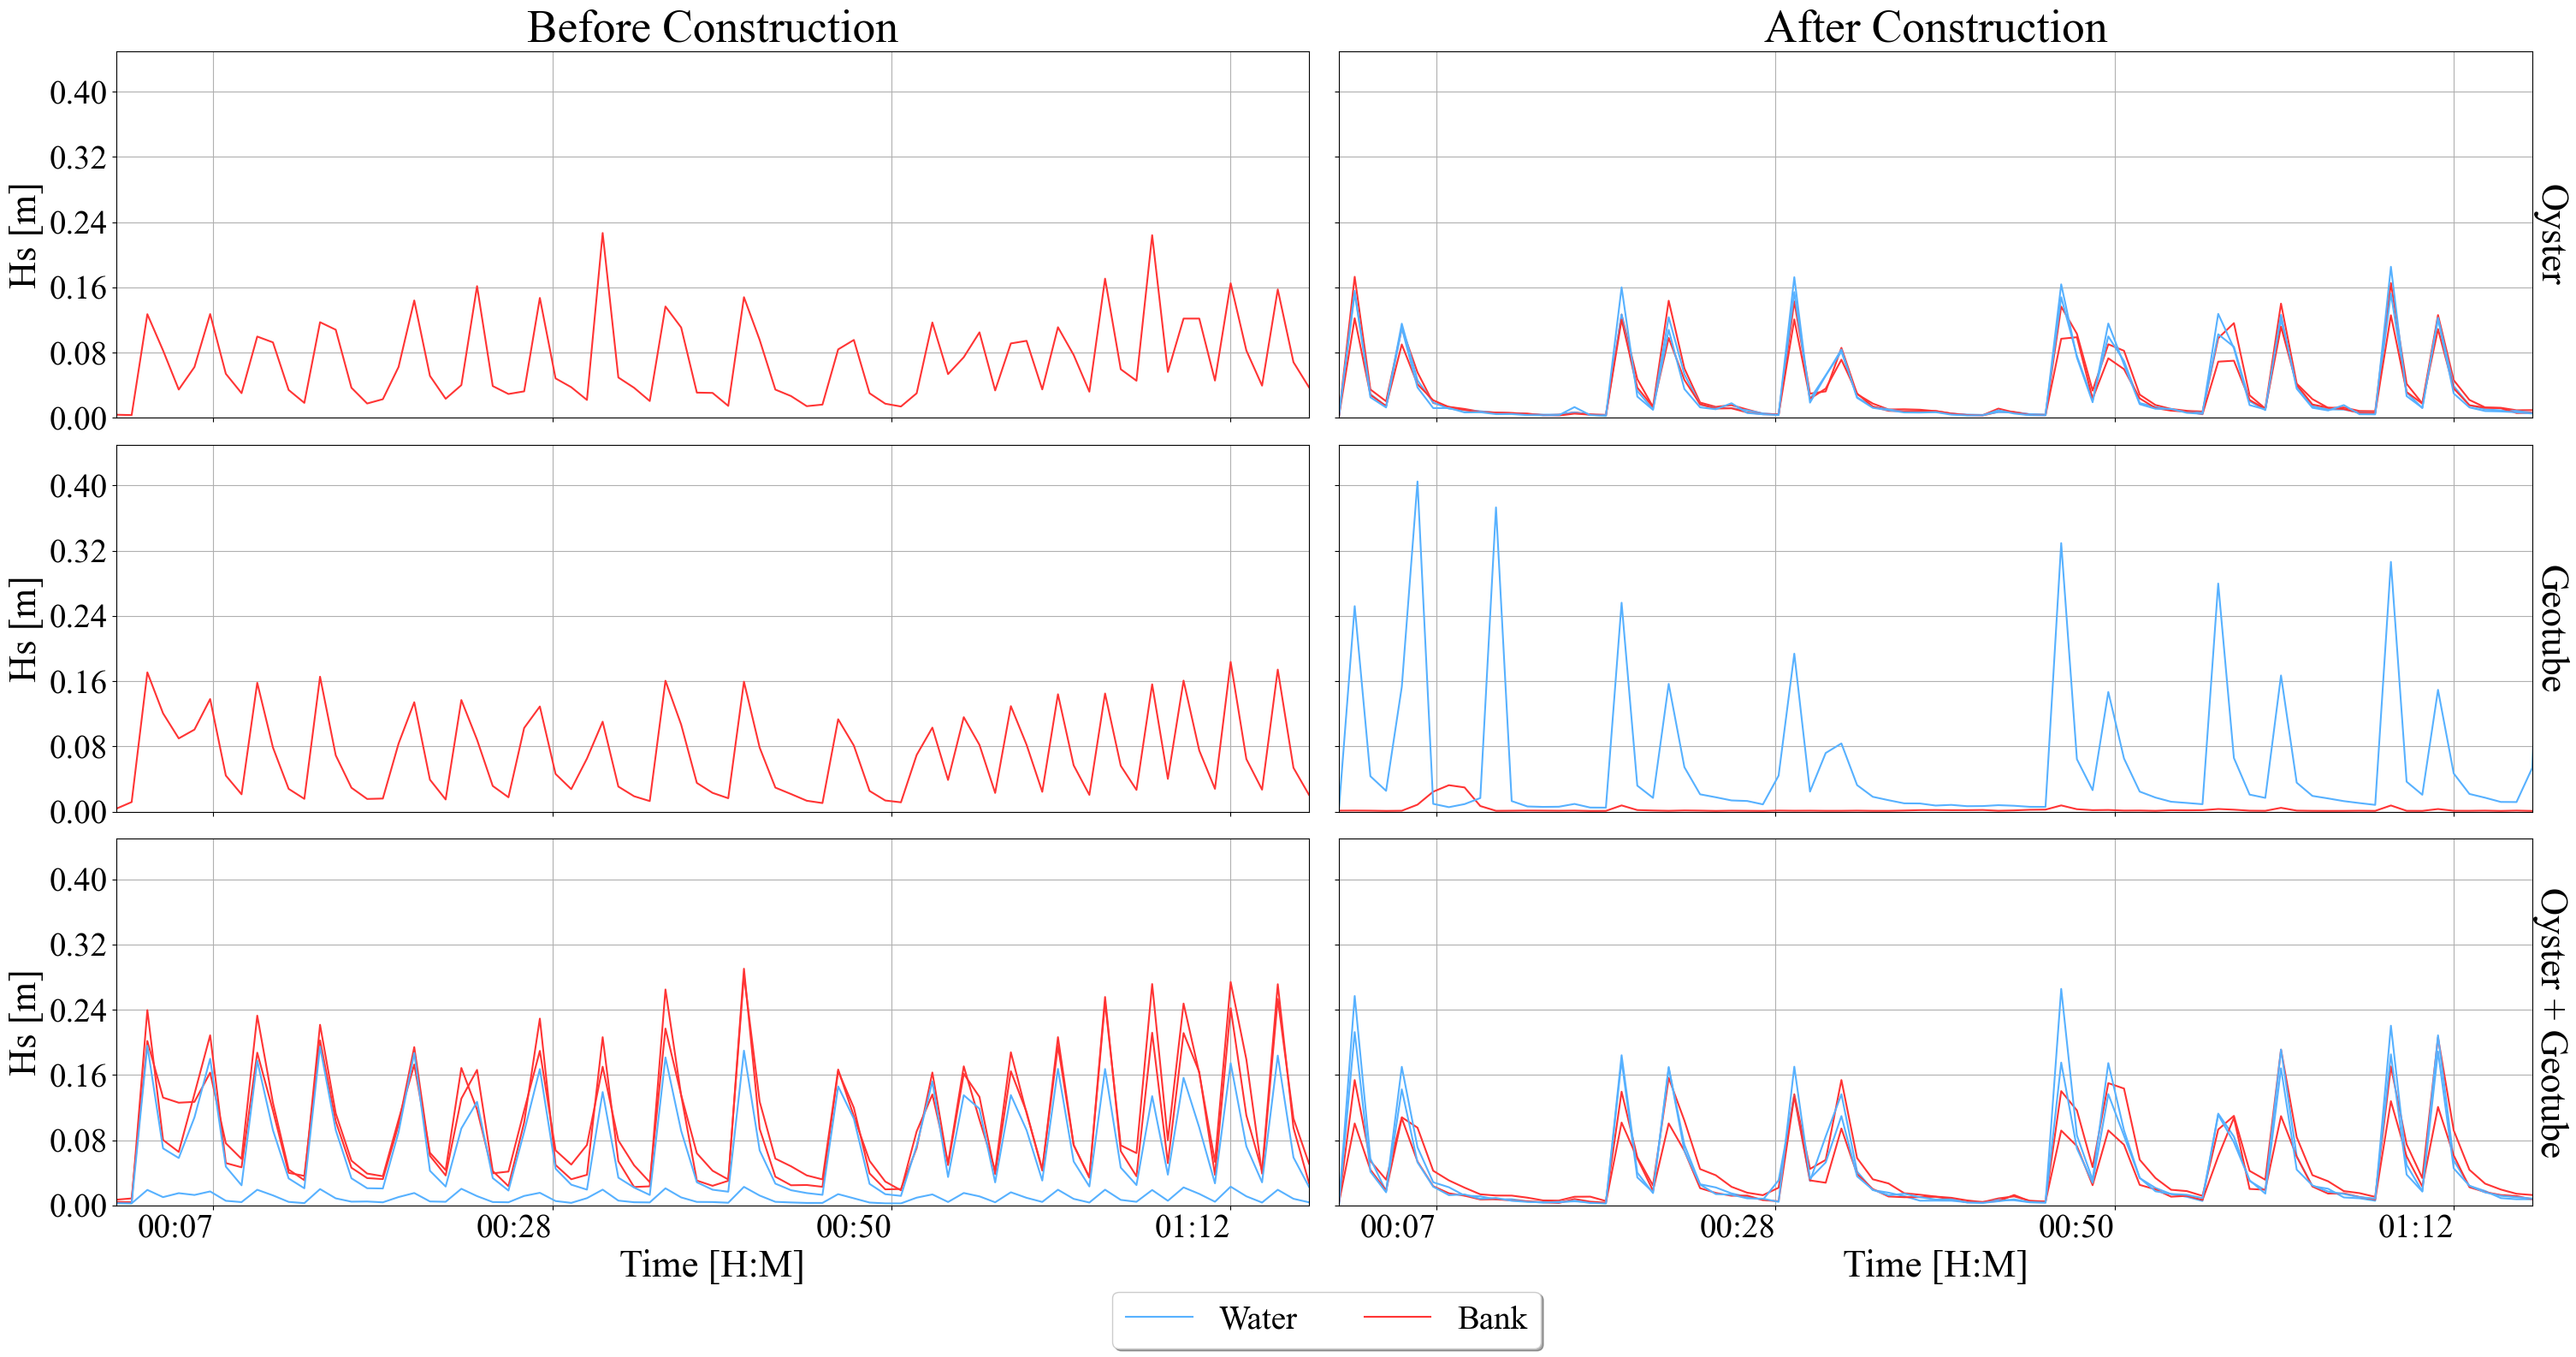

In [9]:
def my_plotter(ax, data1, data2, param_dict = {'marker': ',', 'color': 'black', 'linestyle': 'solid', 'label' : ''}):
    out = ax.plot(data1, data2, **param_dict)
    return out

def formatter(ax):
    ax.grid()
    ax.set_ylim(0, 0.45)
    ax.set_xlim(datetime(2023, 7, 21, 00, 1), datetime(2023, 7, 21, 1, 17))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams.update({'font.size': 32})
    ax.tick_params(axis='x', labelsize = 28)
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation = 0, horizontalalignment = 'right')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5)), ax.yaxis.set_major_locator(plt.MaxNLocator(6))

    return ax



pairs_bf = ['GMU05.nc', 'GMU12.nc', 'GMU03.nc', 'GMU02.nc','GMU06.nc', 'GMU10.nc', 'GMU07.nc']
pairs_af = ['GMU03.nc', 'GMU04.nc', 'GMU05.nc', 'GMU06.nc', 'GMU09.nc', 'GMU10.nc', 'GMU11.nc', 'GMU12.nc', 'GMU07.nc', 'GMU08.nc']

time_standard = []

for i in range(80):
    time_standard.append(datetime(2023, 7, 21, 0, 0) + timedelta(minutes = i))

plots_bf = []
for p in range(len(pairs_bf)):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_072123' / '02_Processed' / 'canal' / pairs_bf[p])
    dt = []
    hs = []
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    for h in range(len(file['Hs'].data)):
        if datetime(2023, 7, 21, 14, 45) <= time[h] <= datetime(2023, 7, 21, 16, 5):
            hs.append(file['Hs'].data[h])
    plots_bf.append([time_standard, hs])

plots_af = []
for p in range(len(pairs_af)):
    file = xr.open_dataset(root / 'Wave_data' / 'rbr_070924' / '02_Processed' / pairs_af[p])
    dt = []
    hs = []
    for t in range(len(file['Time'].data)):
        dt.append(datenum_to_datetime(file['Time'].data[t]))
    time = pd.to_datetime(dt)
    for h in range(len(file['Hs'].data)):
        if datetime(2024, 7, 9, 11, 31) <= time[h] <= datetime(2024, 7, 9, 12, 33):
            hs.append(file['Hs'].data[h])
    plots_af.append([time_standard, hs])

fig, axs = plt.subplots(3, 2, figsize = (30, 15), layout = 'constrained')
#after water = light blue, after bank = light red, before water = dark blue, before bank = dark red
#Only oyster walls

my_plotter(axs[0][0], plots_bf[5][0], plots_bf[5][1], {'color': '#FF3434'})

for h in range(4, 8):
    if h % 2 == 0:
        my_plotter(axs[0][1], plots_af[h][0], plots_af[h][1], {'color': '#FF3434'})
    else:
        my_plotter(axs[0][1], plots_af[h][0], plots_af[h][1], {'color': '#57B1FF'})


#Only geotubes
my_plotter(axs[1][0], plots_bf[6][0], plots_bf[6][1], {'color': '#FF3434'})
my_plotter(axs[1][1], plots_af[8][0], plots_af[8][1], {'color': '#FF3434'}) #after
my_plotter(axs[1][1], plots_af[9][0], plots_af[9][1], {'color': '#57B1FF'})
#plt.title('Geotube')

#Both geotubes and oyster walls
for j in range(4):
    if j % 2 == 0:
        my_plotter(axs[2][0], plots_bf[j][0], plots_bf[j][1], {'color': '#FF3434'})
    else:
        my_plotter(axs[2][0], plots_bf[j][0], plots_bf[j][1], {'color': '#57B1FF'})
for k in range(4):
    if k % 2 == 0:
        my_plotter(axs[2][1], plots_af[k][0], plots_af[k][1], {'color': '#FF3434'})
    else:
        my_plotter(axs[2][1], plots_af[k][0], plots_af[k][1], {'color': '#57B1FF'})
    

#plot formatting
axs[0][0].set_title('Before Construction')
axs[0][1].set_title('After Construction')
for i in range(3):
    axs[i][1].set_yticklabels([])
for i in range(3):
    axs[i][0].set_ylabel('Hs [m]')
date_format = DateFormatter('%H:%M')
for i in range(2):
    axs[2][i].xaxis.set_major_formatter(date_format)
    axs[2][i].set_xlabel('Time [H:M]')
    axs[0][i].set_xticklabels([])
    axs[1][i].set_xticklabels([])
    formatter(axs[0][i])
    formatter(axs[1][i])
    formatter(axs[2][i])
for i in range(3):
    axs[i][0].tick_params(axis='y', labelsize = 28)

axs[0][1].yaxis.set_label_position("right")
axs[0][1].set_ylabel("Oyster", rotation = 270, fontsize = 32)
axs[0][1].yaxis.set_label_coords(1.03, 0.5)

axs[1][1].yaxis.set_label_position("right")
axs[1][1].set_ylabel("Geotube", rotation = 270, fontsize = 32)
axs[1][1].yaxis.set_label_coords(1.03, 0.5)

axs[2][1].yaxis.set_label_position("right")
axs[2][1].set_ylabel("Oyster + Geotube", rotation = 270, fontsize = 32)
axs[2][1].yaxis.set_label_coords(1.03, 0.5)

#defining legend key parameters
water = mlines.Line2D([], [], color = '#57B1FF', linestyle = 'solid', label = 'Water')
bank = mlines.Line2D([], [], color = '#FF3434', linestyle = 'solid', label = 'Bank')
# Put a legend below current axis
fig.legend(handles = [water, bank], loc='center',fontsize = 28, bbox_to_anchor=(0.515, -0.025),
          fancybox=True, shadow=True, ncol=5)
plt.savefig(root / 'Graphs'/ 'bank_all_type_sep_bf_af_sep', bbox_inches = 'tight', pad_inches = 0.1, dpi = 750, transparent = True)
